# <center> Breast Cancer Wisconsin <center>

### Import libraries


In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### Data Collection




In [2]:
# Load data 
# polling data to data frame
from sklearn.datasets import load_breast_cancer
data= load_breast_cancer()
dataset = pd.DataFrame(data.data, columns= data.feature_names)
dataset['target']= data.target



### Data Dictinary

    - radious(mean of distance from center to points on the perimiter)
    
    - texture(standard deviation of gray_scale values)

    - perimeter

    - area

    - smoothness(local variation in radious lengths)

    - compactness((perimeter^2 / area )- 1.0)

    - concavity(sverity of concave portions of the contour)

    - concave points(number of concave portions of the contour)

    - symmetry

    - fractal dimention  ("coastline approximation" - 1)


    - the mean ,standard error, and "worst" or largest (mean
    of the three worst / Largest values) of these feacures
    were computed for each image, resulting in 30 features.



### Data Preproccesing


In [3]:
# looking at dataset and see the vlues and have owerview of data
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [4]:
# whit df.DESCR if the data set have it we can see a owerview of the data set
# such as artour and fecer meanings and.....
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [5]:
dataset.shape

(569, 31)

In [6]:
# see the columns name and datatype of values and amount of non_null numbers in each cokumn
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
# quick way to see the amount of null values
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

### Data Analisis

In [8]:
# see the mean,std,quantile and max,min
dataset.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
# if the values of a column is low we can see the amount of each values
dataset['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

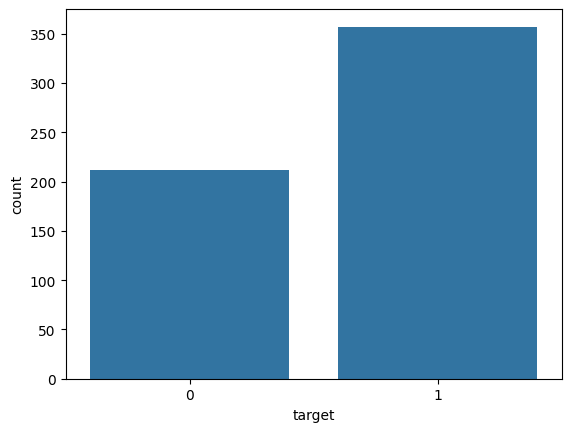

In [10]:
sns.countplot(x='target', data=dataset)

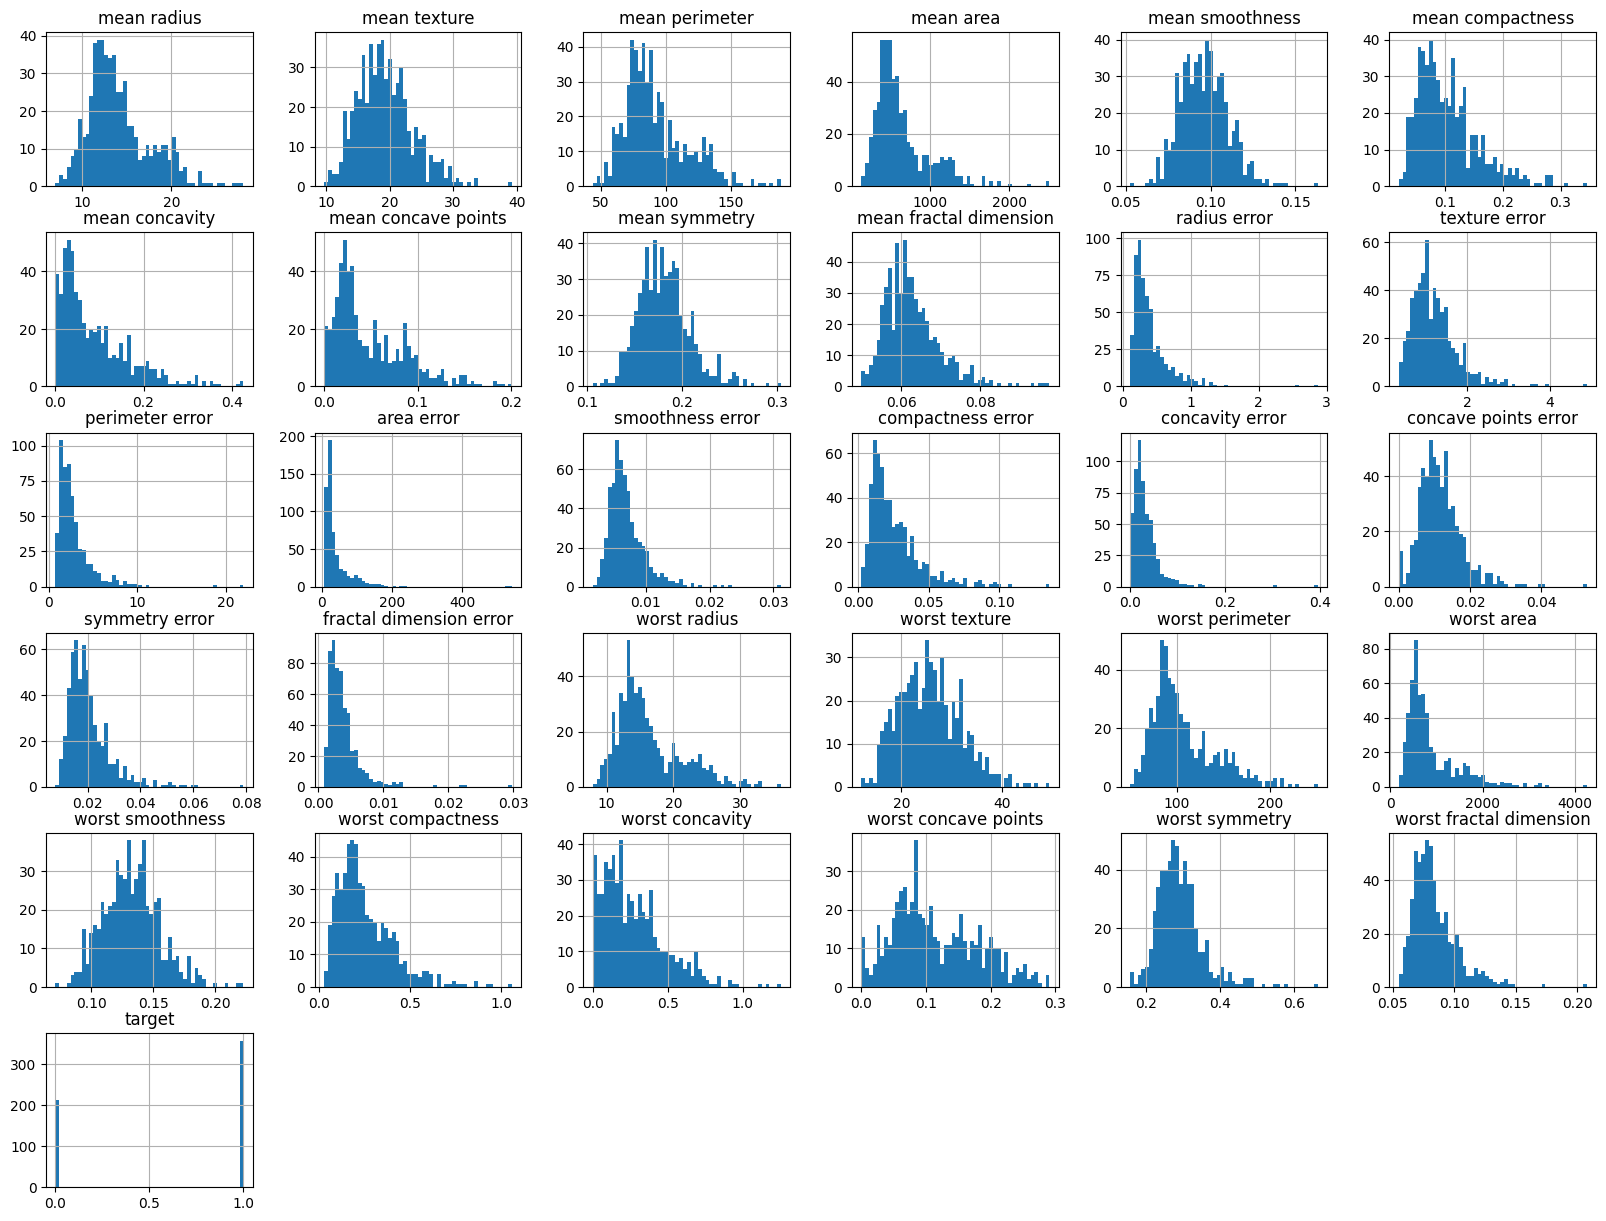

In [11]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

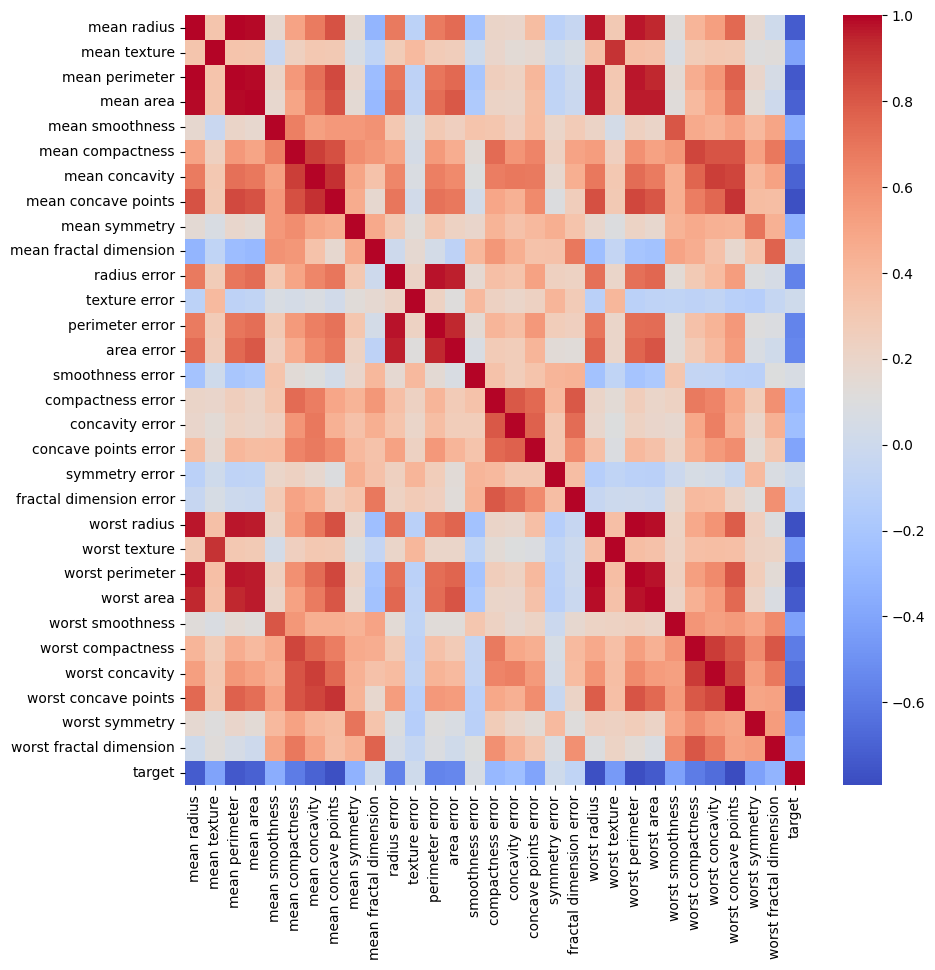

In [12]:
corr_matrix= dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,  cmap='coolwarm', fmt='.2f')
plt.show()

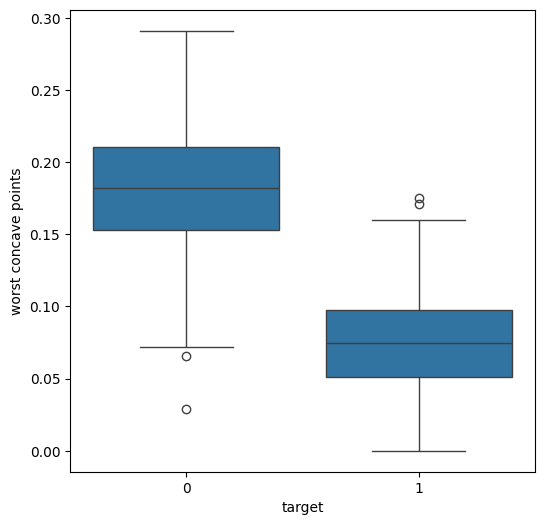

In [13]:

plt.figure(figsize=(6,6))
sns.boxplot(x='target',y= 'worst concave points', data=dataset)
plt.show()


In [14]:
X= dataset.drop('target', axis= 1)
y= dataset['target']


In [15]:
from sklearn.preprocessing import  StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)


In [16]:
# the reason of using random_state is we want to seperate the data in same shape
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=2)


<function matplotlib.pyplot.show(close=None, block=None)>

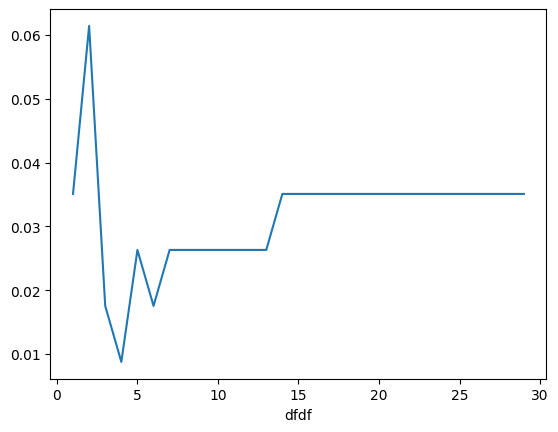

In [17]:
# using KNN Algorithem
# seach for find the best neighbor
from sklearn.neighbors import KNeighborsClassifier
erorr=[]
for i in range(1,30):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred= model.predict(X_test)
    erorr.append(np.mean(y_pred!=y_test))
plt.plot(range(1,30),erorr )
plt.xlabel("dfdf")
plt.show



In [18]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

### Evaluate the model

#### Evaluate with KNN


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy= accuracy_score(y_test, y_pred)
print(accuracy)

cunfusing_matrix= confusion_matrix(y_test, y_pred)
print(cunfusing_matrix)

0.9912280701754386
[[44  1]
 [ 0 69]]


#### Evaluate with LinearRegression


In [22]:
# Use linearRegression model to predict 
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)


In [24]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

cunfusing_matrix= confusion_matrix(y_test,y_pred)
print(cunfusing_matrix)

0.9736842105263158
[[44  1]
 [ 2 67]]
